En esta actividad, generarás y analizarás datos simulados para explorar la relación entre dos 
variables utilizando herramientas estadísticas y visualización en Python.    
REQUERIMIENTOS:    
1. Creación de Datos Simulados (2 puntos)   
    • Generar dos listas de datos numéricos simulados que representen variables relacionadas (ejemplo: horas de ejercicio por semana y presión arterial).    
2. Construcción de una Tabla de Contingencia (2 puntos)    
    • Crear una tabla de contingencia con datos categóricos (ejemplo: grupo de edad y tipo de dieta).    
3. Visualización con Scatterplot (2 puntos)    
    • Crear un gráfico de dispersión (scatterplot) para analizar la relación entre dos variables numéricas.   
4. Cálculo del Coeficiente de Correlación de Pearson (2 puntos)   
    • Calcular el coeficiente de correlación de Pearson e interpretar su resultado.   
5. Reflexión sobre Correlación vs. Causalidad (2 puntos)    
    • Explicar con ejemplos si la correlación encontrada implica causalidad o no.    

In [1]:
#Importar librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
#1. Creacion datos simulados
#Generar 2 listas de datos numericos simulados que representen variables relacionadas
df=pd.read_csv('datos.csv')

print('1. Creacion datos simulados: \n')
print(df.info())
print(df.head(5))
print(df.describe())

1. Creacion datos simulados: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Horas_Ejercicio   150 non-null    float64
 1   Presion_Arterial  150 non-null    float64
 2   Grupo_Edad        150 non-null    object 
 3   Tipo_Dieta        150 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.8+ KB
None
   Horas_Ejercicio  Presion_Arterial Grupo_Edad      Tipo_Dieta
0         5.993428        110.467970      Mayor      Balanceada
1         4.723471        118.258156      Mayor      Balanceada
2         6.295377        107.371600     Adulto  Alta en grasas
3         8.046060        103.869787     Adulto  Alta en grasas
4         4.531693        113.770771     Adulto  Alta en grasas
       Horas_Ejercicio  Presion_Arterial
count       150.000000        150.000000
mean          4.836943        112.551019
std           1.880

In [5]:
#2. Construccion tabla contigencia
#Construir una tabla de contingencia con datos categoricos

tabla_contingencia = pd.crosstab(df['Grupo_Edad'], df['Tipo_Dieta'])
print(f'2. Tabla de contingencia de dos variables categoricas: \n {tabla_contingencia} \n')


2. Tabla de contingencia de dos variables categoricas: 
 Tipo_Dieta  Alta en grasas  Balanceada  Vegetariana
Grupo_Edad                                         
Adulto                  20          27            7
Joven                   10          34            7
Mayor                   12          27            6 



3. Visualizacion de datos con outliers en Scatter Plot: 



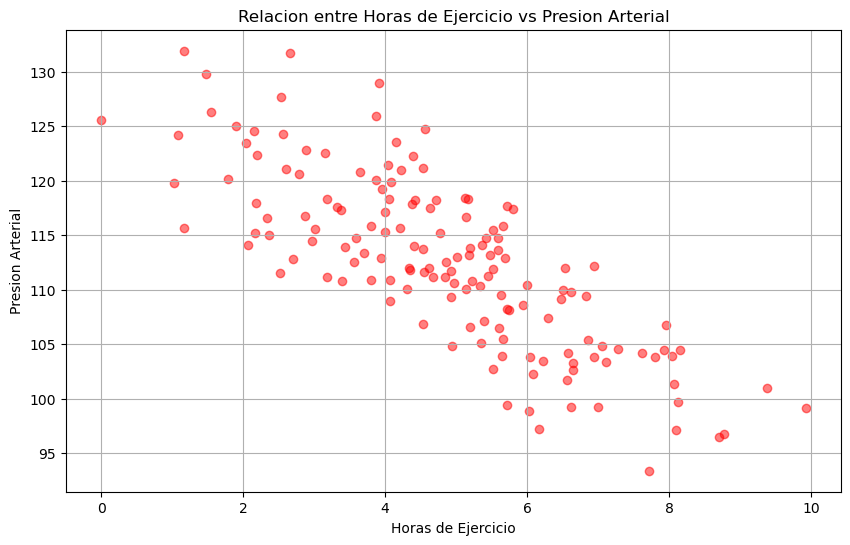

El grafico de dispersión muestra una tendencia negativa, 
 lo que indica que a medida que aumentan las horas de ejercicio, 
 la presión arterial tiende a disminuir. 
 Esto sugiere una relación inversa entre estas dos variables. 

3. Visualizacion de datos sin outliers en Scatter Plot: 



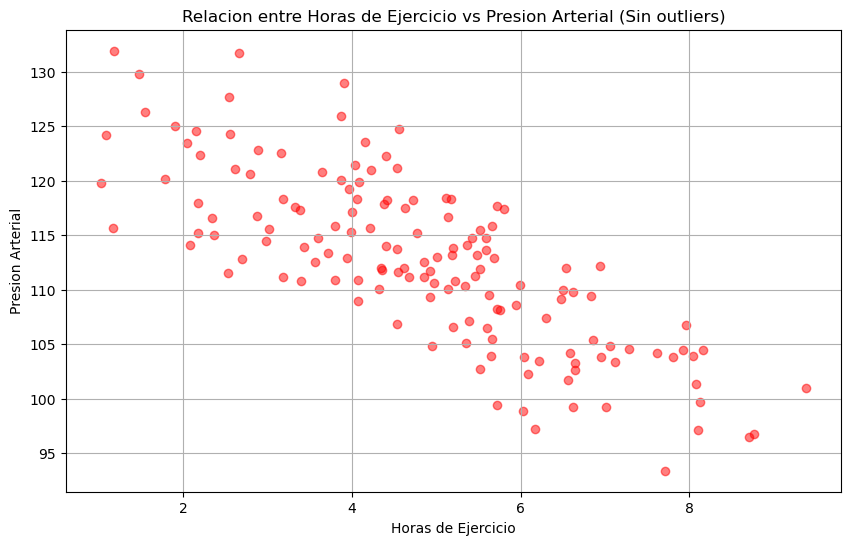

In [31]:
#3. Visualizacion con Scatter Plot
#Visualizar la relacion entre las dos variables numericas con un scatter plot

print('3. Visualizacion de datos con outliers en Scatter Plot: \n')

plt.figure(figsize=(10, 6))
plt.scatter(df['Horas_Ejercicio'], df['Presion_Arterial'], color='red', alpha=0.5)
plt.xlabel('Horas de Ejercicio')
plt.ylabel('Presion Arterial')
plt.title('Relacion entre Horas de Ejercicio vs Presion Arterial')
plt.grid(True)
plt.show() 

print('El grafico de dispersión muestra una tendencia negativa, \n lo que indica que a medida que aumentan las horas de ejercicio, \n la presión arterial tiende a disminuir. \n Esto sugiere una relación inversa entre estas dos variables. \n')

def filtrar_outliers(serie):
    Q1 = np.percentile(serie, 25)
    Q3 = np.percentile(serie, 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return serie[(serie >= limite_inferior) & (serie <= limite_superior)]

horas_filtradas = filtrar_outliers(df['Horas_Ejercicio'])
presion_filtradas = filtrar_outliers(df.loc[horas_filtradas.index, 'Presion_Arterial'])

print('3. Visualizacion de datos sin outliers en Scatter Plot: \n')

plt.figure(figsize=(10, 6))
plt.scatter(horas_filtradas, presion_filtradas, color='red', alpha=0.5)
plt.xlabel('Horas de Ejercicio')
plt.ylabel('Presion Arterial')
plt.title('Relacion entre Horas de Ejercicio vs Presion Arterial (Sin outliers)')
plt.grid(True)
plt.show() 

In [28]:
#4. Cálculo del Coeficiente de Correlación de Pearson
#Calcular el coeficiente de correlación de Pearson e interpretar su resultado

correlacion, p_value = stats.pearsonr(df['Horas_Ejercicio'], df['Presion_Arterial'])
print(f'4. Cálculo del Coeficiente de correlación de Pearson con outliers en los datos:\n')
print(f'Coeficiente: {correlacion:.2f} \n')
print(f'Valor p: {p_value:.4f} \n')
print('Interpretación del coeficiente de correlación de Pearson:')
if correlacion >= 0.8:
    interpretacion = "correlación positiva fuerte" 
elif correlacion >= 0.5:
    interpretacion = "correlación positiva moderada"
elif correlacion >= 0.2:
    interpretacion = "correlación positiva débil"
elif correlacion >= -0.2:
    interpretacion = "correlación despreciable o nula"
elif correlacion >= -0.5:
    interpretacion = "correlación negativa débil"
elif correlacion >= -0.8:
    interpretacion = "correlación negativa moderada" 
else:
    interpretacion = "correlación negativa fuerte"

print(f"Con outliers en los datos, tenemos un coeficiente de {correlacion:.2f} y, por lo tanto, una {interpretacion}.")
print(f"El p-valor de {p_value:.4f} {'es' if p_value < 0.05 else 'no es'} estadísticamente significativo (α = 0.05). \n")

correlacion, p_value = stats.pearsonr(horas_filtradas, presion_filtradas)
print(f'4. Cálculo del Coeficiente de correlación de Pearson sin outliers en los datos: \n')
print(f'Coeficiente: {correlacion:.2f} \n')
print(f'Valor p: {p_value:.4f} \n')
print('Interpretación del coeficiente de correlación de Pearson:')
if correlacion >= 0.8:
    interpretacion = "correlación positiva fuerte"
elif correlacion >= 0.5:
    interpretacion = "correlación positiva moderada"
elif correlacion >= 0.2:
    interpretacion = "correlación positiva débil"
elif correlacion >= -0.2:
    interpretacion = "correlación despreciable o nula"
elif correlacion >= -0.5:
    interpretacion = "correlación negativa débil"
elif correlacion >= -0.8:
    interpretacion = "correlación negativa moderada"
else:
    interpretacion = "correlación negativa fuerte"

print(f"Sin outliers en los datos, tenemos un coeficiente de {correlacion:.2f} y, por lo tanto, una {interpretacion}.")
print(f"El p-valor de {p_value:.4f} {'es' if p_value < 0.05 else 'no es'} estadísticamente significativo (α = 0.05). \n")

4. Cálculo del Coeficiente de correlación de Pearson con outliers en los datos:

Coeficiente: -0.79 

Valor p: 0.0000 

Interpretación del coeficiente de correlación de Pearson:
Con outliers en los datos, tenemos un coeficiente de -0.79 y, por lo tanto, una correlación negativa moderada.
El p-valor de 0.0000 es estadísticamente significativo (α = 0.05). 

4. Cálculo del Coeficiente de correlación de Pearson sin outliers en los datos: 

Coeficiente: -0.78 

Valor p: 0.0000 

Interpretación del coeficiente de correlación de Pearson:
Sin outliers en los datos, tenemos un coeficiente de -0.78 y, por lo tanto, una correlación negativa moderada.
El p-valor de 0.0000 es estadísticamente significativo (α = 0.05). 



5. Reflexión sobre Correlación vs. Causalidad: 

   -La correlación negativa entre las horas de ejercicio y la presión arterial no implica causalidad.   
   -Aunque existe una relación entre estas dos variables, no podemos concluir que una cause la otra.    
   -Es posible que otros factores, como la dieta, el estrés o la genética, también influyan en la presión arterial.   
   -Para establecer una relación causal, se necesitarían estudios más controlados y experimentales que consideren estas variables adicionales.   
   -En este caso, existen estudios actualizados que comprueban que existe una relación causal entre la cantidad de horas de ejercicio y la presión arterial,   
    pero es importante no asumir causalidad solo por la correlación observada en los datos.   